# <center>Costa Rican House Features <center> Exploration of households level rating </center>

#####  158.755_DataScience
      Project3 
      By: Rania Alghniemin & Sneha 
      Students ID:17288644 & 18044262
      Semester Two_2018 
      Data Science,Assigment3
   

## Abstract:

Over the last decade, Costa Rica has taken large strides in its economic and social development, underpinned by health services, education and almost universal pensions. Costa Rica is renowned for its ecological footprint, forest protection and abundant biodiversity. Life-expectancy is in line with OECD levels, there is a relatively large middle class and life satisfaction is similar to some OECD countries. However,
Costa Rica still has faced a  problem as the region’s population grows and poverty declines. The Inter-American Development Bank, which introduced a program focussed on the poorest segment of the population, based on a dataset of Costa Rican household characteristics to help improvement the Proxy Means Test (or PMT) performance. Through this analytical research we will contribute of improvement, through Kaggle platform to implement a new algorithm could be help other countries around the world. This study includes contributing to the definition of the poverty line in Costa Rica based on the identification of the poorest households, which lack the basic requirements of life (basic components of the home) compared to the number of its members.

![](http://borgenproject.org/wp-content/uploads/Costa2_opt.jpg)

## Introduction

This project analyses the main dataset of Costa Rican household characteristics,that include the materials of their walls and ceiling,household members and their education component found in the home to classify them and predict their level of need. (Costa Rican Household Poverty Level Prediction dataset). It will use the ID(a unique identifier for each row) and Idhogar(house features rate) to classify the household based on the house features,(1,2,3 and 4). All rows in a given household will have a matching value for this identifier. Then it uses line regression and Knn models to learn this data and predict some values. At the end, it performs cluster analysis to answer some questions.


### Key Research questions

    1. Analyse the relationship between the house features rate: 8 house features with family members.
    2. Analyse the relationship between the Target and Idhogar.
    3. Determine the proverty line in Costa Rica.
    4. Predict the average Idhogar.
    5. Predict the number of the householdes by using linear regression.
    6. Predict the average Idhogar in specific cases by using KNN models.


### DataSets 

1. Costa Rican Household Poverty Level Prediction by Kaggle API

In [1]:
import pandas as pd
import numpy as np
import time
import datetime
import matplotlib.pyplot as plt
import pylab
import seaborn as sns
from pylab import rcParams
from matplotlib import cm

%matplotlib inline

In [2]:
train=pd.read_csv("train.csv",)
train.head()


ID_num      v2a1  hacdor  rooms  hacapo  v14a  refrig  v18q  v18q1  \
0  ID_279628684  190000.0       0      3       0     1       1     0    NaN   
1  ID_f29eb3ddd  135000.0       0      4       0     1       1     1    1.0   
2  ID_68de51c94       NaN       0      8       0     1       1     0    NaN   
3  ID_d671db89c  180000.0       0      5       0     1       1     1    1.0   
4  ID_d56d6f5f5  180000.0       0      5       0     1       1     1    1.0   

   r4h1   ...    SQBescolari  SQBage  SQBhogar_total  SQBedjefe  SQBhogar_nin  \
0     0   ...            100    1849               1        100             0   
1     0   ...            144    4489               1        144             0   
2     0   ...            121    8464               1          0             0   
3     0   ...             81     289              16        121             4   
4     0   ...            121    1369              16        121             4   

   SQBovercrowding  SQBdependency  SQBmeaned  agesq  Target  
0         1.000000            0.0      100.0   1849       4  
1         1.000000           64.0      144.0   4489       4  
2         0.250000           64.0      121.0   8464       4  
3         1.777778            1.0      121.0    289       4  
4         1.777778            1.0      121.0   1369       4  

[5 rows x 143 columns]

#### Filling NAN values:

In [3]:
a=int(train['v2a1'].mean())

train = train.fillna(a)
#train = train.fillna(value=int(train.mean()))
train.head()
#a=int(train['v2a1'].mean())
#train['v2a1'] = train['v2a1'].fillna(value=round(int(a)))
#df['v2a1'].fillna(train.mean()).astype(int)
#train.head()
#train['v18q1'] = train['v18q1'].fillna(value=train['v18q1'].mean())
#train.head()

ID_num      v2a1  hacdor  rooms  hacapo  v14a  refrig  v18q  \
0  ID_279628684  190000.0       0      3       0     1       1     0   
1  ID_f29eb3ddd  135000.0       0      4       0     1       1     1   
2  ID_68de51c94  165231.0       0      8       0     1       1     0   
3  ID_d671db89c  180000.0       0      5       0     1       1     1   
4  ID_d56d6f5f5  180000.0       0      5       0     1       1     1   

      v18q1  r4h1   ...    SQBescolari  SQBage  SQBhogar_total  SQBedjefe  \
0  165231.0     0   ...            100    1849               1        100   
1       1.0     0   ...            144    4489               1        144   
2  165231.0     0   ...            121    8464               1          0   
3       1.0     0   ...             81     289              16        121   
4       1.0     0   ...            121    1369              16        121   

   SQBhogar_nin  SQBovercrowding  SQBdependency  SQBmeaned  agesq  Target  
0             0         1.000000            0.0      100.0   1849       4  
1             0         1.000000           64.0      144.0   4489       4  
2             0         0.250000           64.0      121.0   8464       4  
3             4         1.777778            1.0      121.0    289       4  
4             4         1.777778            1.0      121.0   1369       4  

[5 rows x 143 columns]

In [4]:
print ("Train Dataset: Rows, Columns: ", train.shape)


Train Dataset: Rows, Columns:  (9557, 143)


In [5]:
train.describe()

v2a1       hacdor        rooms       hacapo         v14a  \
count  9.557000e+03  9557.000000  9557.000000  9557.000000  9557.000000   
mean   1.652312e+05     0.038087     4.955530     0.023648     0.994768   
std    7.991617e+04     0.191417     1.468381     0.151957     0.072145   
min    0.000000e+00     0.000000     1.000000     0.000000     0.000000   
25%    1.652310e+05     0.000000     4.000000     0.000000     1.000000   
50%    1.652310e+05     0.000000     5.000000     0.000000     1.000000   
75%    1.652310e+05     0.000000     6.000000     0.000000     1.000000   
max    2.353477e+06     1.000000    11.000000     1.000000     1.000000   

            refrig         v18q          v18q1         r4h1         r4h2  \
count  9557.000000  9557.000000    9557.000000  9557.000000  9557.000000   
mean      0.957623     0.231767  126936.184158     0.385895     1.559171   
std       0.201459     0.421983   69724.118550     0.680779     1.036574   
min       0.000000     0.000000       1.000000     0.000000     0.000000   
25%       1.000000     0.000000  165231.000000     0.000000     1.000000   
50%       1.000000     0.000000  165231.000000     0.000000     1.000000   
75%       1.000000     0.000000  165231.000000     1.000000     2.000000   
max       1.000000     1.000000  165231.000000     5.000000     8.000000   

          ...       SQBescolari       SQBage  SQBhogar_total    SQBedjefe  \
count     ...       9557.000000  9557.000000     9557.000000  9557.000000   
mean      ...         74.222769  1643.774302       19.132887    53.500262   
std       ...         76.777549  1741.197050       18.751395    78.445804   
min       ...          0.000000     0.000000        1.000000     0.000000   
25%       ...         16.000000   289.000000        9.000000     0.000000   
50%       ...         36.000000   961.000000       16.000000    36.000000   
75%       ...        121.000000  2601.000000       25.000000    81.000000   
max       ...        441.000000  9409.000000      169.000000   441.000000   

       SQBhogar_nin  SQBovercrowding  SQBdependency      SQBmeaned  \
count   9557.000000      9557.000000    9557.000000    9557.000000   
mean       3.844826         3.249485       3.900409     188.980209   
std        6.946296         4.129547      12.511831    3777.358135   
min        0.000000         0.040000       0.000000       0.000000   
25%        0.000000         1.000000       0.111111      36.000000   
50%        1.000000         2.250000       0.444444      81.000000   
75%        4.000000         4.000000       1.777778     134.560010   
max       81.000000        36.000000      64.000000  165231.000000   

             agesq       Target  
count  9557.000000  9557.000000  
mean   1643.774302     3.302292  
std    1741.197050     1.009565  
min       0.000000     1.000000  
25%     289.000000     3.000000  
50%     961.000000     4.000000  
75%    2601.000000     4.000000  
max    9409.000000     4.000000  

[8 rows x 138 columns]

In [6]:
df = pd.DataFrame({'fammem_num':train.r4t3,'Mon_Sal':train.v2a1,'Rooms':train.rooms,\
                   'No_elec':train.noelec,'No_refr':train.refrig,'No_toilet':train.sanitario1,\
                   'No_kitch':train.energcocinar1,'No_bath':train.v14a})
df.index = train.ID_num
df.head()

fammem_num   Mon_Sal  Rooms  No_elec  No_refr  No_toilet  \
ID_num                                                                   
ID_279628684           1  190000.0      3        0        1          0   
ID_f29eb3ddd           1  135000.0      4        0        1          0   
ID_68de51c94           1  165231.0      8        0        1          0   
ID_d671db89c           4  180000.0      5        0        1          0   
ID_d56d6f5f5           4  180000.0      5        0        1          0   

              No_kitch  No_bath  
ID_num                           
ID_279628684         0        1  
ID_f29eb3ddd         0        1  
ID_68de51c94         0        1  
ID_d671db89c         0        1  
ID_d56d6f5f5         0        1

In [7]:
Mon_sal_avrg= df.Mon_Sal.mean()
print ('The average of salarys monthly  per family = ',int(Mon_sal_avrg),'$CRC/month.') 

The average of salarys monthly  per family =  165231 $CRC/month.


In [8]:
fammem_num_avrg= int(df.fammem_num.mean())
print ('The average of members for per family = ',fammem_num_avrg,'persons/family.') 

The average of members for per family =  4 persons/family.


In [9]:
Numh_fammem=0
for i in range(len(df)):
    if df.fammem_num[i] > 4:
        Numh_fammem+=1
print ('The household have 4 persons or more=',Numh_fammem,'household')

The household have 4 persons or more= 3117 household


In [10]:
Numh_rooms_avrg=int(df.Rooms.mean())
print ('The avarage of rooms number that household own =', Numh_rooms_avrg,'rooms')

The avarage of rooms number that household own = 4 rooms


In [11]:
Numh_ro=0
for i in range(len(df)):
    if df.Rooms[i] > 4:
        Numh_ro+=1
print ('The househols have less than 4 rooms=',Numh_ro,'rooms')

The househols have less than 4 rooms= 5795 rooms


In [12]:
Numh_no_elec=0
for x in df.No_elec:
    if x==1:
        Numh_no_elec+=1

print ('The count of household they have no elecricity =', Numh_no_elec,'households')

The count of household they have no elecricity = 21 households


In [13]:
Numh_no_toilet=0
for x in df.No_toilet:
    if x==1:
        Numh_no_toilet+=1

print ('The count of household they have no Toilet =', Numh_no_toilet,'households')

The count of household they have no Toilet = 37 households


In [14]:
Numh_no_bath=0
for x in df.No_bath:
    if x==0:
        Numh_no_bath+=1

print ('The count of household they have no Bathroom =', Numh_no_bath,'households')

The count of household they have no Bathroom = 50 households


In [15]:
Numh_no_kit=0
for x in df.No_kitch:
    if x==1:
        Numh_no_kit+=1

print ('The count of household they have no water =', Numh_no_kit,'households')

The count of household they have no water = 18 households


## The level of household basic facilities:

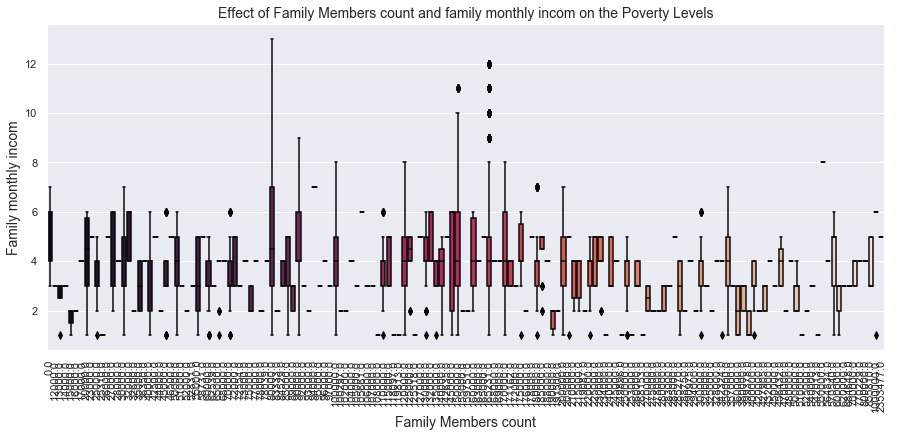

In [16]:
sns.set(rc={'figure.figsize':(15, 6)})
sns.boxplot(x=df.Mon_Sal,y= df.fammem_num,palette="rocket", data=train)
plt.title("Effect of Family Members count and family monthly incom on the Poverty Levels", fontsize=14)
plt.xticks(rotation='vertical')
plt.xlabel('Family Members count',fontsize=14)
plt.ylabel('Family monthly incom',fontsize=14)
plt.show()


### 1. Determine the poverty line:

#### 1.1 Add person_incom column to train csv file:

In [18]:
train['person_incom'] = (train['v2a1']/train['tamviv'])

train.head()

ID_num      v2a1  hacdor  rooms  hacapo  v14a  refrig  v18q  \
0  ID_279628684  190000.0       0      3       0     1       1     0   
1  ID_f29eb3ddd  135000.0       0      4       0     1       1     1   
2  ID_68de51c94  165231.0       0      8       0     1       1     0   
3  ID_d671db89c  180000.0       0      5       0     1       1     1   
4  ID_d56d6f5f5  180000.0       0      5       0     1       1     1   

      v18q1  r4h1      ...       SQBage  SQBhogar_total  SQBedjefe  \
0  165231.0     0      ...         1849               1        100   
1       1.0     0      ...         4489               1        144   
2  165231.0     0      ...         8464               1          0   
3       1.0     0      ...          289              16        121   
4       1.0     0      ...         1369              16        121   

   SQBhogar_nin  SQBovercrowding  SQBdependency  SQBmeaned  agesq  Target  \
0             0         1.000000            0.0      100.0   1849       4   
1             0         1.000000           64.0      144.0   4489       4   
2             0         0.250000           64.0      121.0   8464       4   
3             4         1.777778            1.0      121.0    289       4   
4             4         1.777778            1.0      121.0   1369       4   

   person_incom  
0      190000.0  
1      135000.0  
2      165231.0  
3       45000.0  
4       45000.0  

[5 rows x 144 columns]

In [19]:
a=train['person_incom']
for i in range(len(a)):
    poverty_line= a.mean()
#df.Mon_Sal[i]/df.fammem_num[i]
print ('The provety line', round(poverty_line),'CRC/person monthly')


The provety line 50506 CRC/person monthly


### 1.2 up/down poverty line (the family who get less than 50494 crc/person per month is an under the the poverty line)

In [20]:

train['Poverty_line:(16000crc/prs)'] = np.where(train['person_incom']< poverty_line, 'down', 'up')
             
                                
train.head()

ID_num      v2a1  hacdor  rooms  hacapo  v14a  refrig  v18q  \
0  ID_279628684  190000.0       0      3       0     1       1     0   
1  ID_f29eb3ddd  135000.0       0      4       0     1       1     1   
2  ID_68de51c94  165231.0       0      8       0     1       1     0   
3  ID_d671db89c  180000.0       0      5       0     1       1     1   
4  ID_d56d6f5f5  180000.0       0      5       0     1       1     1   

      v18q1  r4h1             ...               SQBhogar_total  SQBedjefe  \
0  165231.0     0             ...                            1        100   
1       1.0     0             ...                            1        144   
2  165231.0     0             ...                            1          0   
3       1.0     0             ...                           16        121   
4       1.0     0             ...                           16        121   

   SQBhogar_nin  SQBovercrowding  SQBdependency  SQBmeaned  agesq  Target  \
0             0         1.000000            0.0      100.0   1849       4   
1             0         1.000000           64.0      144.0   4489       4   
2             0         0.250000           64.0      121.0   8464       4   
3             4         1.777778            1.0      121.0    289       4   
4             4         1.777778            1.0      121.0   1369       4   

   person_incom  Poverty_line:(16000crc/prs)  
0      190000.0                           up  
1      135000.0                           up  
2      165231.0                           up  
3       45000.0                         down  
4       45000.0                         down  

[5 rows x 145 columns]

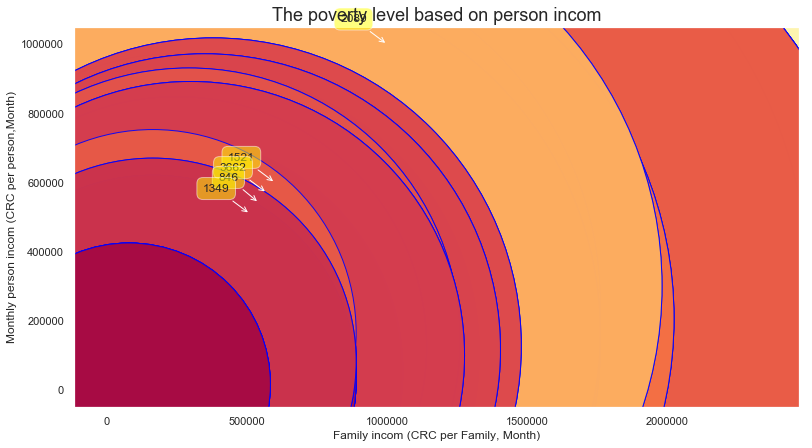

In [21]:
plt.figure(6,[13,7],facecolor='w',edgecolor='w')
plt.scatter(train['v2a1'],train['person_incom'],s=train['v2a1'], c=train['person_incom'],alpha=0.9,facecolors="white",edgecolors="blue",cmap=plt.get_cmap('Spectral'))

plt.title('The poverty level based on person incom',fontsize=18)
plt.xlabel('Family incom (CRC per Family, Month)')
plt.ylabel('Monthly person incom (CRC per person,Month)')

Sorted_con=train.sort_values('person_incom',ascending=False)

top_5=Sorted_con.head(5)
for label,x , y in zip(top_5.index,top_5.v2a1,top_5.person_incom):
    plt.annotate(label,xy=(x, y), xytext=(-20,20),textcoords='offset points',ha='right', va='bottom',bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5), arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

ax=plt.plot()
plt.show()

#### 1.3 Calculate the number of households they have income less than 16000 CRC monthly:

In [22]:
Num_less_prov=0
for i in range(len(df)):
    if train.v2a1[i]/train.tamviv[i] < poverty_line:
        Num_less_prov+=1
print ('The count of household they get income less than 50494.0 CRC per person  =', Num_less_prov,\
       'households')
#df['Num_less_prov'] = Num_less_prov
#df.head()

The count of household they get income less than 50494.0 CRC per person  = 5986 households


### Therefor, 50494 households live under the provrty line...

In [104]:
#train.to_csv('modified_train.csv')
#train.head()

In [23]:
Sub=pd.DataFrame()
Sub['ID'] = train['ID_num']
Sub['Family_incom'] = train['v2a1']
Sub['Count_Fml_members']=train['tamviv']
Sub['person_incom'] = train['person_incom'] 
Sub['poverty_line:(16000crc/prs)'] = train['Poverty_line:(16000crc/prs)'] 
Sub['Target']= train['Target']
Sub.to_csv('New_submission.csv',index=False)
Sub.head()

ID  Family_incom  Count_Fml_members  person_incom  \
0  ID_279628684      190000.0                  1      190000.0   
1  ID_f29eb3ddd      135000.0                  1      135000.0   
2  ID_68de51c94      165231.0                  1      165231.0   
3  ID_d671db89c      180000.0                  4       45000.0   
4  ID_d56d6f5f5      180000.0                  4       45000.0   

  poverty_line:(16000crc/prs)  Target  
0                          up       4  
1                          up       4  
2                          up       4  
3                        down       4  
4                        down       4

In [24]:
%%javascript
require(['base/js/utils'],
function(utils) {
   utils.load_extensions('calico-spell-check', 'calico-document-tools', 'calico-cell-tools');
});


<IPython.core.display.Javascript object>

## https://www.kaggle.com/rania16/new-submition-dataset/edit